# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [81]:
# Combine the data into a single dataset
mousestudy_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mousestudy_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [82]:
# Combine the data into a single dataset
# Display the data table for preview


mousestudy2 =pd.merge(study_results, mouse_metadata, on="Mouse ID")
mousestudy2.head()

mousestudy2.style.format({"Tumor Voulume (mm3)":"{:.2f}".format})


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [83]:
mice_count = mousestudy2["Mouse ID"].value_counts()
number_of_mice= len(mice_count)
number_of_mice

249

In [2]:
# Checking the number of mice.


249

In [84]:
#dupmice_ID = mousestudy2.np.array([["Mouse ID", "Timepoint"]])
#duplicate_mice = mousestudy2.loc[mousestudy2.duplicated(subset=["Mouse ID", "Timepoint"])].unique()
mousestudy2[mousestudy2[['Mouse ID', 'Timepoint']].duplicated() ==True]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [85]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint

dupmouse_ID = mousestudy2.loc[mousestudy2.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dupmouse_ID

array(['g989'], dtype=object)

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


array(['g989'], dtype=object)

In [86]:
mousestudy2["Mouse ID"] == 'g989'

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool

In [87]:
mousestudy2.loc[mousestudy2['Mouse ID'] == 'g989',:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [88]:
cleanmouse_df = mousestudy2[mousestudy2['Mouse ID'].isin(dupmouse_ID)==False]
#cleanmouse_df["Tumor Volume (mm3)"] = cleanmouse_df["Tumor Volume (mm3)"]
#.map("{:.2f}".format)
cleanmouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [89]:
cleanmouse_df["Mouse ID"].nunique()
#cleanmouse_count = cleanmouse_df["Mouse ID"].value_counts()
#cleanmouse_count

248

In [95]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleanmouse_df.sort_values("Mouse ID", ascending=False)
#cleanmouse_df.drop_duplicates(subset="Mouse ID", keep=False)
#cleanmouse_df

new_cleanmouse = cleanmouse_df.drop_duplicates("Mouse ID")
new_cleanmouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [94]:
# Checking the number of mice in the clean DataFrame.

new_cleanmouse["Mouse ID"].nunique()

248

In [6]:
# Checking the number of mice in the clean DataFrame.


248

## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
#summary_stat = pd.DataFrame(mousestudy2.groupby("Drug Regimen").count())
#summary_stat



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [52]:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

mean = mousestudy2.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = mousestudy2.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = mousestudy2.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_deviation = mousestudy2.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
stderrmean= mousestudy2.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summarystat_df = pd.DataFrame({"Mean Tumor Volume": mean,
                              "Median Tumor Volume": median,
                              "Tumor Volume Variance": variance,
                              "Tumor Volume Std. Dev.": standard_deviation,
                              "Tumor Volume Std. Err.": stderrmean})
summarystat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_stat2 = mousestudy2.groupby("Drug Regimen")
summary_statdf = summary_stat2.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
summary_statdf 

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line



## Bar and Pie Charts

In [141]:
#Using pandas
#Filtering the DataFrame to only those columns to chart

#mice_drug = new_cleanmouse[["Drug Regimen","Mouse ID"]].value_counts()
#mice_drug =(new_cleanmouse("Mouse ID").count())
mice_drug = pd.DataFrame(mousestudy2.groupby(["Drug Regimen"]).count()).reset_index()
mice_drug.sort_values("Mouse ID").head()
mice_drug.head()

#Filtering the DataFrame to only those columns to chart

mice_drugplt = mice_drug[["Drug Regimen","Mouse ID"]]
mice_drugplt
#summary_stat
#set index to "Drug Regimen"and use as chart label

mice_drugplt.set_index("Drug Regimen").sort_values("Mouse ID", ascending=False)

#mice_drugplt


,Mouse ID
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


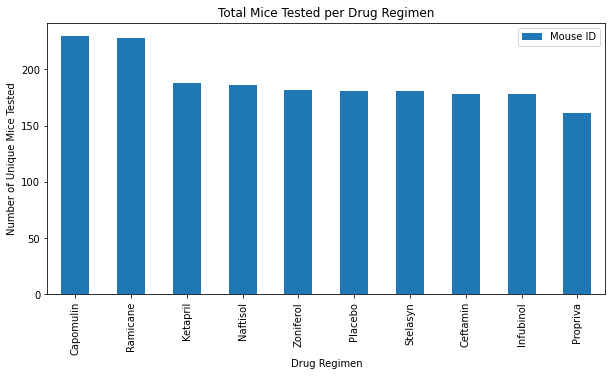

<Figure size 432x288 with 0 Axes>

In [143]:
#using DataFrame.plot() for bar chart
mice_drugplt.set_index("Drug Regimen").sort_values("Mouse ID", ascending=False).plot(kind="bar", figsize=(10,5))
#mice_drugplt
mice_drugplt.set_index("Drug Regimen")
#chart title and axis
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Unique Mice Tested",fontsize = 10)
plt.title("Total Mice Tested per Drug Regimen")

plt.show()
plt.tight_layout()

#mice_drugplt.set_index("Drug Regimen")

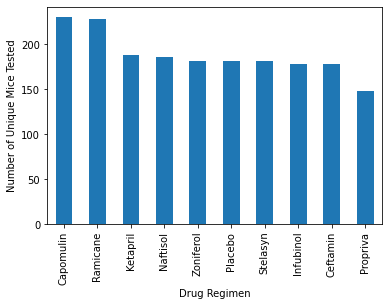

In [19]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.


In [ ]:
x_axis = np.arange(len(mice_drugplt))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, mice_drugplt["Drug Regimen"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, mice_drugplt["Drug Regimen"], rotation="vertical")

#set x and y limmits
plt.xlim(-0.75,len(x_axis))
plt.ylim(0, max(mice_drugplt["Drug Regimen"])+10)

#Title and labels

plt.title("Total Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")

plt.tight_layout()
Plt.show()

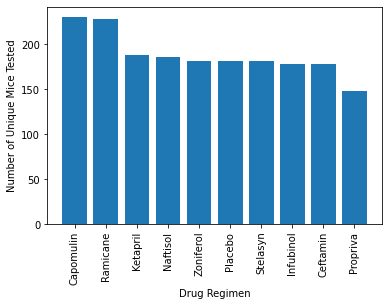

In [20]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.


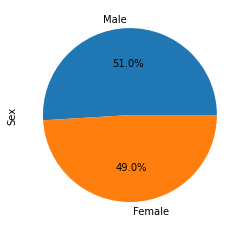

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


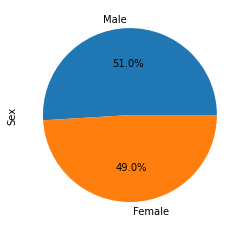

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


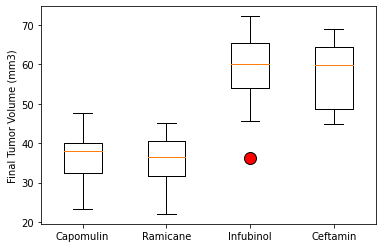

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

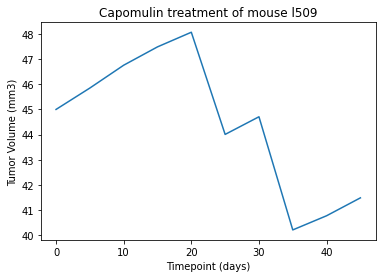

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


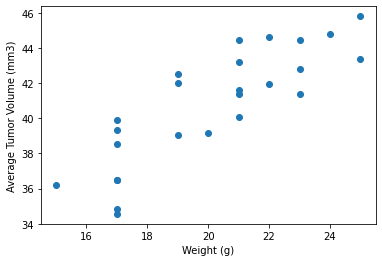

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


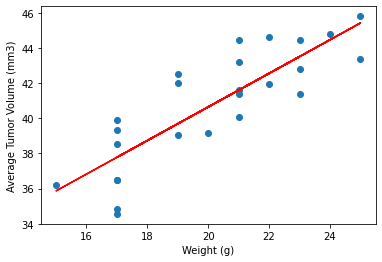

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
